DATA PREPROCESSING

In [86]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Handling missing values
print("\nHandling missing values:")
print("Number of missing values per column:")
print(df.isnull().sum())

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Confirming missing values have been handled
print("\nAfter handling missing values:")
print("Number of missing values per column:")
print(df.isnull().sum())

# Convert categorical variables into dummy/indicator variables
print("\nConverting categorical variables into dummy/indicator variables:")
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the dataset after encoding categorical variables
print("Dataset after encoding categorical variables:")
print(df.head())

# Split the dataset into features and target variable
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
print("\nSplitting the dataset into training and testing sets:")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of training target:", y_train.shape)
print("Shape of testing target:", y_test.shape)


First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

APPLY MACHINE LEARNING MODEL

LINEAR REGRESSION


Training Linear Regression model:
Linear Regression R^2: 0.4429978856405674


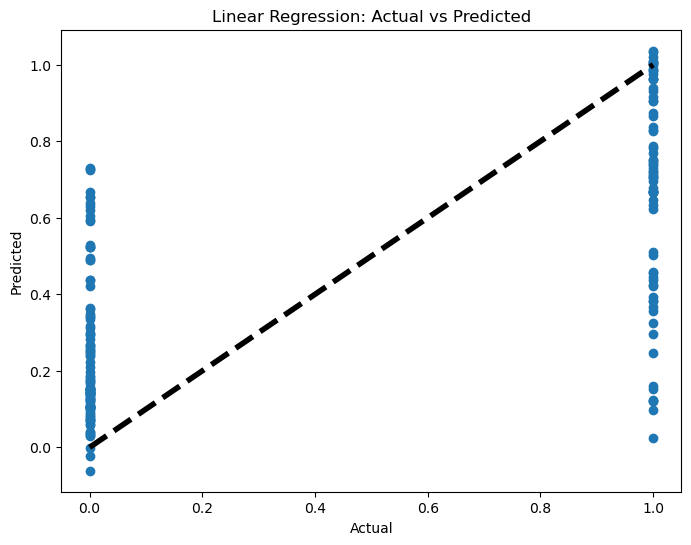

In [91]:
# Initialize and fit Linear Regression model
print("\nTraining Linear Regression model:")
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict using the model
y_pred_lr = lr.predict(X_test)

# Evaluation
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression R^2:", r2_lr)

# Visualization 2: Scatter plot of predicted vs actual values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


LOGISTIC REGRESSION


Training Logistic Regression model:
Logistic Regression Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]


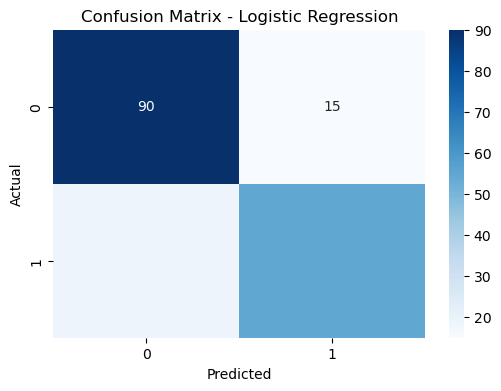

In [92]:
# Initialize and fit Logistic Regression model
print("\nTraining Logistic Regression model:")
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predict using the model
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Confusion Matrix:\n", cm_log_reg)

# Visualization 3: Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM


Training SVM model:
SVM Accuracy: 0.7910447761194029
Confusion Matrix:
 [[134  23]
 [ 33  78]]


C:\Users\manoy\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


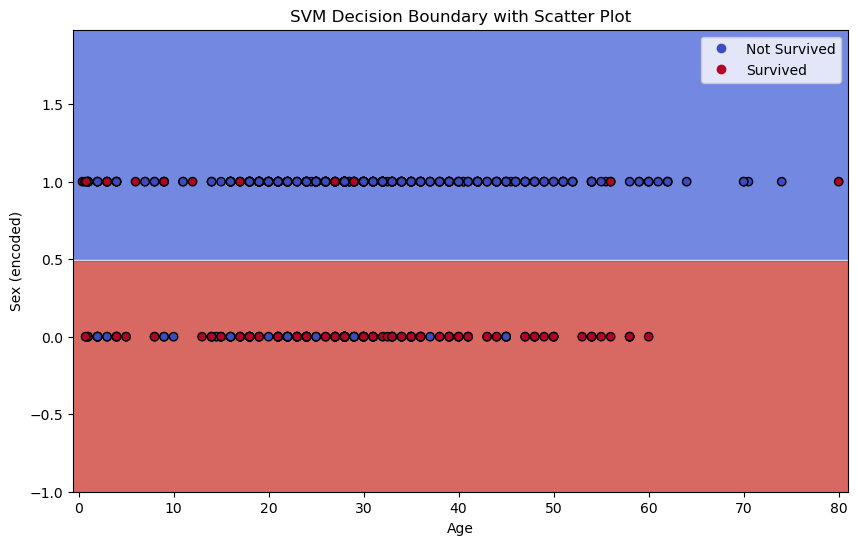

In [108]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Titanic CSV file
df = pd.read_csv('titanic.csv')

# Handle missing values and convert 'Age' to float
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Encode 'Sex' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex_encoded'] = encoder.fit_transform(df['Sex'])

# Prepare X and y
X = df[['Age', 'Sex_encoded']]
y = df['Survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit SVM model
print("\nTraining SVM model:")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict using the model
y_pred_svm = svm.predict(X_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", cm_svm)

# Visualization: Scatter plot with decision boundary
plt.figure(figsize=(10, 6))

# Create a mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train['Age'].min() - 1, X_train['Age'].max() + 1
y_min, y_max = X_train['Sex_encoded'].min() - 1, X_train['Sex_encoded'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
scatter = plt.scatter(X_train['Age'], X_train['Sex_encoded'], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Sex (encoded)')
plt.title('SVM Decision Boundary with Scatter Plot')
plt.legend(handles=scatter.legend_elements()[0], labels=['Not Survived', 'Survived'])
plt.show()


DECISION TREE


Training Decision Tree model:


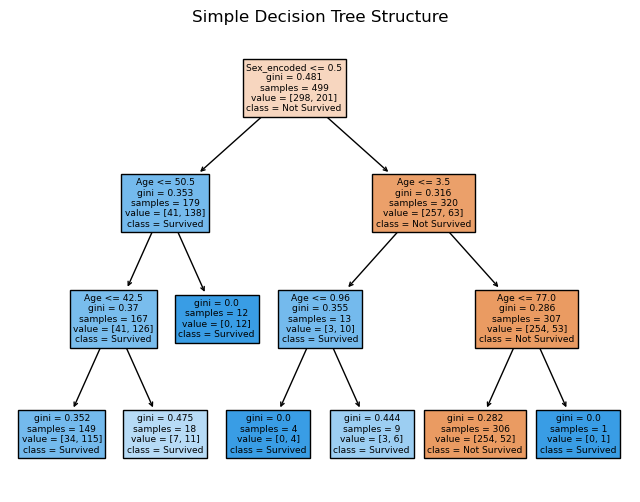

In [103]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from Titanic CSV file
df = pd.read_csv('titanic.csv')

# Drop rows with missing 'Age' values and convert 'Age' to float
df = df.dropna(subset=['Age'])
df['Age'] = df['Age'].astype(float)

# Encode 'Sex' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex_encoded'] = encoder.fit_transform(df['Sex'])

# Prepare X and y
X = df[['Age', 'Sex_encoded']]
y = df['Survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Decision Tree model with max_depth=3
print("\nTraining Decision Tree model:")
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Visualization: Simple Decision Tree structure
plt.figure(figsize=(8, 6))
plot_tree(dt, filled=True, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'], max_depth=3)
plt.title('Simple Decision Tree Structure')
plt.show()


RANDOM FOREST


Training Random Forest model:


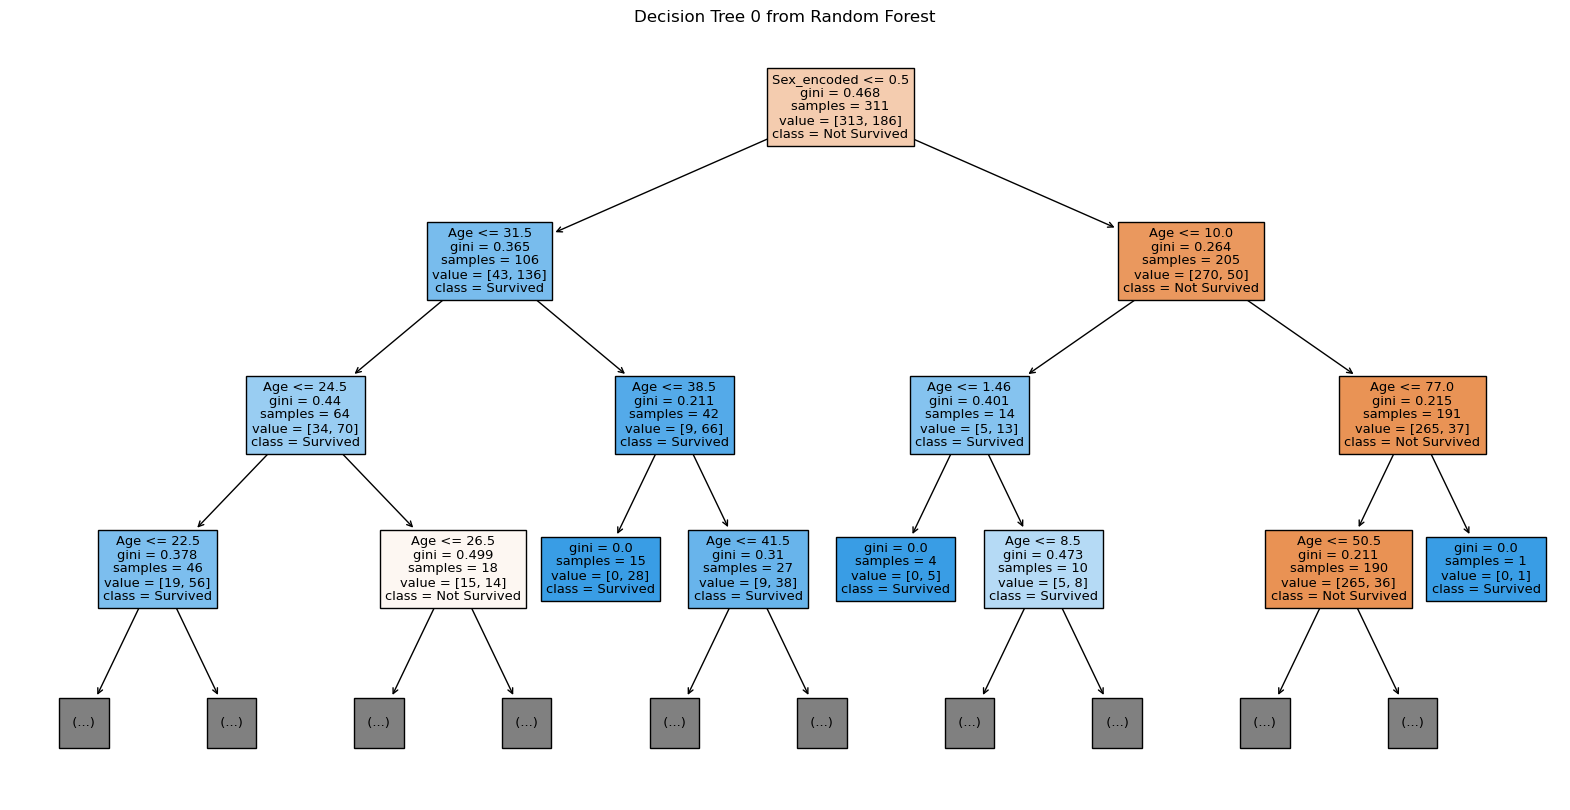

In [106]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data from Titanic CSV file
df = pd.read_csv('titanic.csv')

# Drop rows with missing 'Age' values and convert 'Age' to float
df = df.dropna(subset=['Age'])
df['Age'] = df['Age'].astype(float)

# Encode 'Sex' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex_encoded'] = encoder.fit_transform(df['Sex'])

# Prepare X and y
X = df[['Age', 'Sex_encoded']]
y = df['Survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Random Forest model
print("\nTraining Random Forest model:")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Visualization: Decision Tree structure from Random Forest
plt.figure(figsize=(20, 10))
tree_index = 0  # Adjust this index to visualize different trees from the forest
plot_tree(rf.estimators_[tree_index], filled=True, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'], max_depth=3)
plt.title(f'Decision Tree {tree_index} from Random Forest')
plt.show()


NAIVE BAYES

In [110]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Split the dataset into features and target variable
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Naive Bayes model
print("\nTraining Naive Bayes model:")
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict using the model
y_pred_nb = nb.predict(X_test)

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)



Training Naive Bayes model:
Naive Bayes Accuracy: 0.770949720670391


KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


KNN Accuracy: 0.7150837988826816
Confusion Matrix:
 [[89 16]
 [35 39]]


VISUALIZATION

Visualize the distribution of passengers by survival

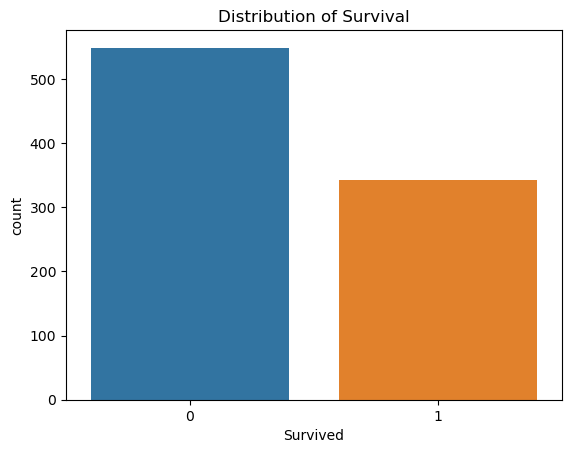

In [70]:
 import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.show()


Visualize the age distribution of passengers

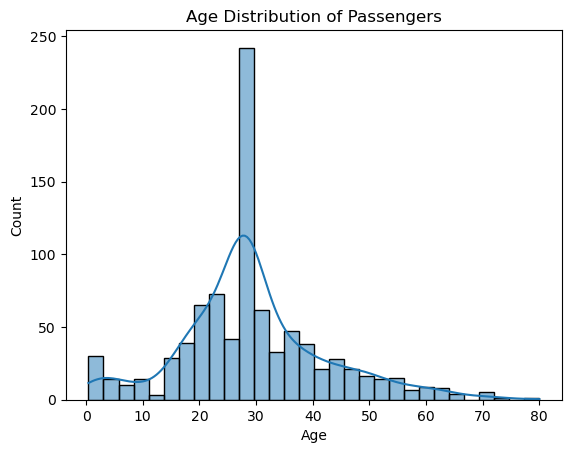

In [71]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()


Visualize the survival rate by gender

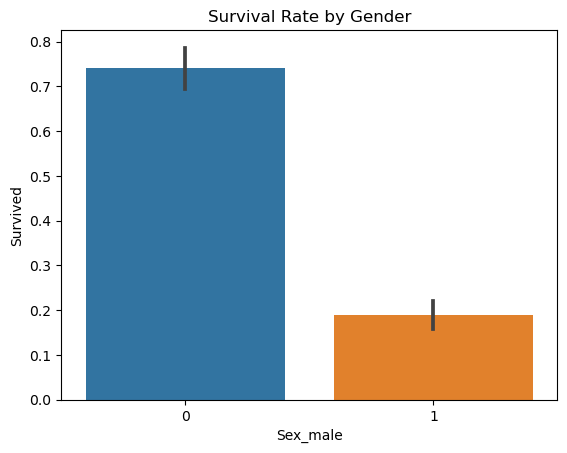

In [74]:
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


Visualize the survival rate by class

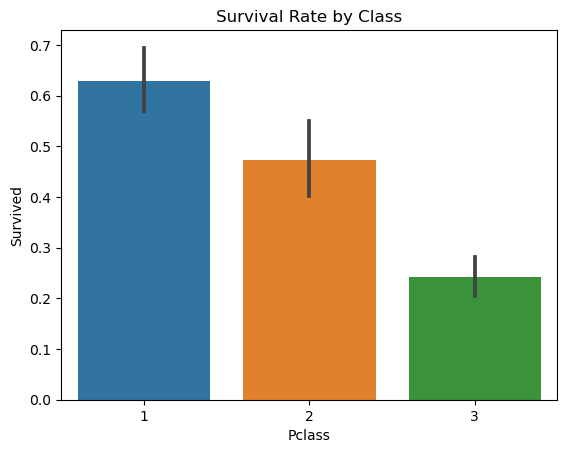

In [75]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()
